In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries and data

In [ ]:
#Libraries
import pandas as pd
import numpy as np

In [ ]:
#Data
df = pd.read_csv(r"/content/drive/MyDrive/Datasc/Forecasting Models and Time Series for Business in Python/Daily Bike Sharing.csv", 
                 index_col = "dteday", 
                 parse_dates = True)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Select variables
dataset = df.loc[:,["cnt", "holiday", "workingday", "weathersit", "temp", "atemp",
                   "hum", "windspeed"]]
dataset.head(1)

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


Data transformation

In [ ]:
#Renaming variable
dataset = dataset.rename(columns = {"cnt" : "y"})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [ ]:
#index
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [ ]:
#freq = None - significa que para Python los intervalos no nos frecuentes con el tiempo, esto no es cierto así que necesitamos corregir el parámetro freq
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

Visualization

<AxesSubplot:xlabel='dteday'>

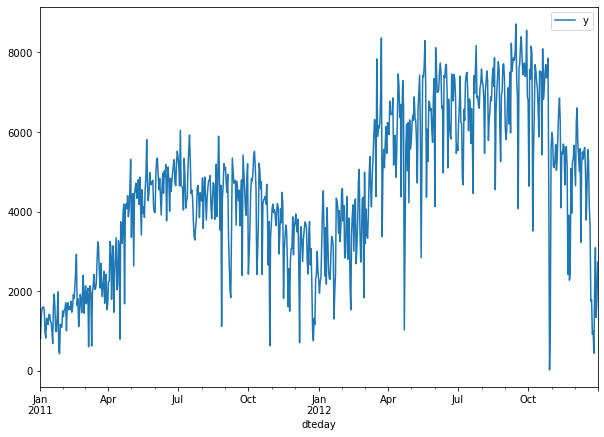

In [ ]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

Training and test Set

In [ ]:
#Training and test set ( test van a ser los últimos 31 días del dataset)
test_days = 31
training_set = dataset.iloc[:-test_days, :] #todo menos los últimos 31 días
test_set = dataset.iloc[-test_days:, :]

Forecasting model

In [ ]:
#Libraries


In [ ]:
#Forecasting model


C:\Users\Alvaro\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Alvaro\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
#Predictions
predictions_X = model.forecast(steps = test_days).rename("X")
predictions_X.head()

2012-12-01    4703.434234
2012-12-02    4152.109049
2012-12-03    4376.195688
2012-12-04    4211.156937
2012-12-05    4896.528749
Freq: D, Name: HW, dtype: float64

<AxesSubplot:xlabel='dteday'>

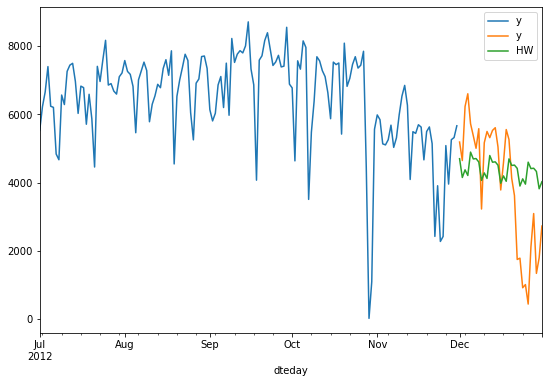

In [ ]:
#Visualization
training_set["y"]["2012-07-01":].plot(figsize = (9, 6), legend = True)
test_set["y"].plot(legend = True)
predictions_X.plot(legend = True)

Model assessment

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set["y"], predictions_X),0))
print(round(np.sqrt(mean_squared_error(test_set["y"], predictions_X)),0))

1390.0
1713.0


In [ ]:
#MAPE function
def MAPE (y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100
MAPE(test_set["y"], predictions_X)

88.14082811284679

Export forecast

In [ ]:
predictions_X.to_csv("3_predictions_X.csv", index = True)